# Getting necessary packages and functions

In [2]:
#.libPaths("C:/Users/jwhite/Documents/R/win-library/3.4")
#country.code <- 'us'
#url.pattern <- 'http://'
#repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
#options(repos = repo.data.frame$URL)

In [3]:
#install.packages("rlang", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("ggplot2", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("Rcpp", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("scatterplot3d", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("irr", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("reshape2", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("geomorph", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("Morpho", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)
#install.packages("car", lib = "C:/Users/jwhite/Documents/R/win-library/3.4", dependencies = TRUE)

In [5]:
library(ggplot2)
library(readr)
library(plyr)
library(irr)
library(reshape2)
library(geomorph)
library(Morpho)
library(car)

Warning message:
"package 'readr' was built under R version 3.4.1"Warning message:
"package 'plyr' was built under R version 3.4.1"Warning message:
"package 'irr' was built under R version 3.4.1"Loading required package: lpSolve
Warning message:
"package 'lpSolve' was built under R version 3.4.1"Warning message:
"package 'geomorph' was built under R version 3.4.3"Loading required package: rgl
Warning message:
"package 'rgl' was built under R version 3.4.3"Loading required package: ape
Warning message:
"package 'ape' was built under R version 3.4.3"Warning message:
"package 'Morpho' was built under R version 3.4.3"

In [4]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Intra-observer error of landmark coordinates themselves

## Arslan

In [6]:
ArslanManualLandmarks <- read.table(file = "C:/Users/Julie White/Box Sync/MyFiles/MyResearch/RemappingValidation/Manual_Landmarking/Arslan/ArslanManualLandmarks.txt", header = TRUE, sep = "\t")
head(ArslanManualLandmarks)

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3
61549,Arslan,1,a,Glabella,Middle,37.69,5.98,102.35,38.19,7.81,102.61,39.21,9.89,102.76
61549,Arslan,2,b,Nasion,Middle,36.71,-8.09,99.93,37.36,-8.13,99.80,36.89,-7.67,99.82
61549,Arslan,3,c,Pronasale,Middle,35.71,-43.25,123.03,36.51,-43.96,122.97,36.20,-42.71,122.93
61549,Arslan,4,d,Subnasale,Middle,34.23,-55.84,108.94,34.39,-56.52,108.72,34.20,-57.23,108.63
61549,Arslan,5,e,Labiale superius,Middle,32.26,-70.34,110.02,33.70,-72.79,109.32,33.43,-71.68,109.84
61549,Arslan,7,f,Labiale inferius,Middle,32.42,-88.56,104.13,33.04,-88.94,103.84,33.69,-87.10,105.01


In [7]:
unique(ArslanManualLandmarks$Landmark.Name)

[1] Glabella             Nasion               Pronasale           
 [4] Subnasale            Labiale superius     Labiale inferius    
 [7] Pogonion             Endocanthion left    Endocanthion right  
[10] Exocanthion left     Exocanthion right    Alar curvature left 
[13] Alar curvature right Subalare left        Subalare right      
[16] Crista philtri left  Crista philtri right Chelion left        
[19] Chelion right       
19 Levels: Alar curvature left Alar curvature right ... Subnasale

My thought is to find the centroid of the three replicates, then take the euclidean distance from each replicate to that centroid, then take the standard deviation of those euclidean distances as a measure of error

In [8]:
#Calculate the centroid
ArslanManualLandmarks$xi <- apply(ArslanManualLandmarks[,c(7, 10, 13)], 1, function(x) mean(x,na.rm = TRUE))
ArslanManualLandmarks$yi <- apply(ArslanManualLandmarks[,c(8, 11, 14)], 1, function(x) mean(x,na.rm = TRUE))
ArslanManualLandmarks$zi <- apply(ArslanManualLandmarks[,c(9, 12, 15)], 1, function(x) mean(x,na.rm = TRUE))    

#Calculate euclidean distances of each replicate to the centroid
ArslanManualLandmarks$euclidean_1 <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sqrt(sum((x[['x_1']] - x[['xi']])^2 + (x[['y_1']] - x[['yi']])^2 + (x[['z_1']] - x[['zi']])^2)))
ArslanManualLandmarks$euclidean_2 <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sqrt(sum((x[['x_2']] - x[['xi']])^2 + (x[['y_2']] - x[['yi']])^2 + (x[['z_2']] - x[['zi']])^2)))
ArslanManualLandmarks$euclidean_3 <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sqrt(sum((x[['x_3']] - x[['xi']])^2 + (x[['y_3']] - x[['yi']])^2 + (x[['z_3']] - x[['zi']])^2)))

#Calculate the standard deviation of the euclidean distances
ArslanManualLandmarks$sd_euclidean <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sd(x[c('euclidean_1', 'euclidean_2', 'euclidean_3')]))

head(ArslanManualLandmarks)

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,x_1,y_1,z_1,x_2,...,x_3,y_3,z_3,xi,yi,zi,euclidean_1,euclidean_2,euclidean_3,sd_euclidean
61549,Arslan,1,a,Glabella,Middle,37.69,5.98,102.35,38.19,...,39.21,9.89,102.76,38.36333,7.893333,102.5733,2.0406127,0.1957890,2.1767790,1.10651381
61549,Arslan,2,b,Nasion,Middle,36.71,-8.09,99.93,37.36,...,36.89,-7.67,99.82,36.98667,-7.963333,99.8500,0.3146250,0.4118927,0.3103045,0.05744536
61549,Arslan,3,c,Pronasale,Middle,35.71,-43.25,123.03,36.51,...,36.20,-42.71,122.93,36.14000,-43.306667,122.9767,0.4369846,0.7508588,0.6014889,0.15699788
61549,Arslan,4,d,Subnasale,Middle,34.23,-55.84,108.94,34.39,...,34.20,-57.23,108.63,34.27333,-56.530000,108.7633,0.7135747,0.1248555,0.7163488,0.34070084
61549,Arslan,5,e,Labiale superius,Middle,32.26,-70.34,110.02,33.70,...,33.43,-71.68,109.84,33.13000,-71.603333,109.7267,1.5617156,1.3778445,0.3297305,0.66459746
61549,Arslan,7,f,Labiale inferius,Middle,32.42,-88.56,104.13,33.04,...,33.69,-87.10,105.01,33.05000,-88.200000,104.3267,0.7517831,0.8857451,1.4444876,0.36741860


In [9]:
#Look at euclidean distances themselves
summary(ArslanManualLandmarks$euclidean_1)
summary(ArslanManualLandmarks$euclidean_2)
summary(ArslanManualLandmarks$euclidean_3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0423  0.4676  0.7512  1.5058  1.2046 62.7715 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01054  0.44028  0.69986  1.11864  1.11117 31.53609 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01333  0.47038  0.77146  1.17387  1.19019 31.26979 

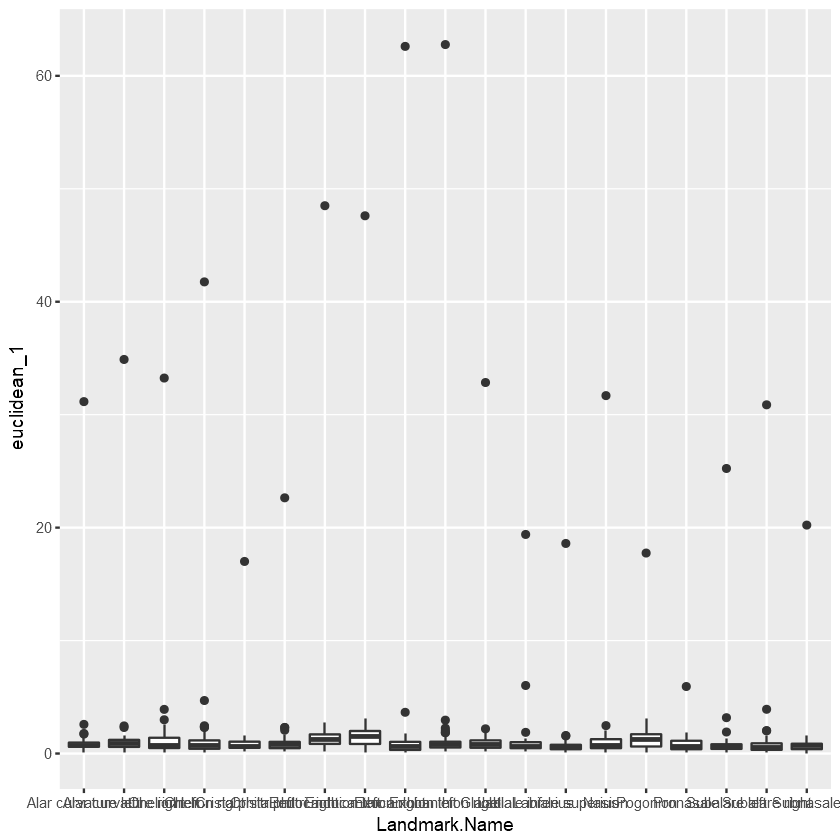

In [10]:
ggplot(ArslanManualLandmarks, aes(x = Landmark.Name, y = euclidean_1))+geom_boxplot()

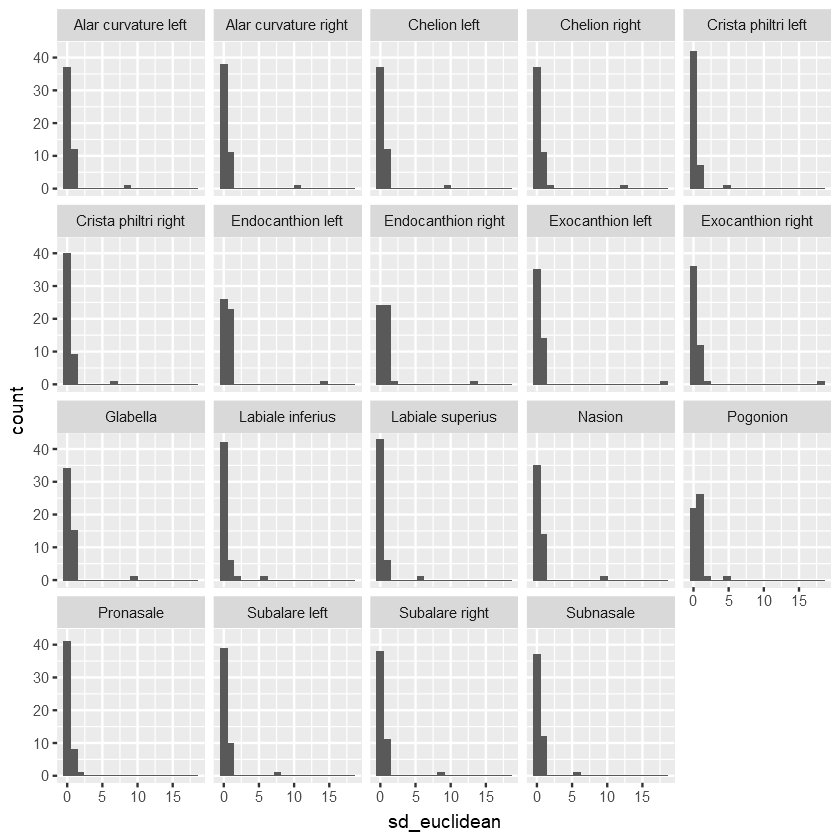

In [11]:
ggplot(ArslanManualLandmarks, aes(sd_euclidean))+geom_histogram(bins = 20) + facet_wrap(~Landmark.Name)

It looks like Arslan mostly has euclidean distances that are similar, but lets look at the high euclidean distances to see where those are coming from. 

In [12]:
ArslanHighEuclideanSD <- ArslanManualLandmarks[which(ArslanManualLandmarks$sd_euclidean >= 5),]
head(ArslanHighEuclideanSD)
unique(ArslanHighEuclideanSD$IID)
unique(ArslanHighEuclideanSD$Landmark.Name)

,IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,x_1,y_1,z_1,x_2,...,x_3,y_3,z_3,xi,yi,zi,euclidean_1,euclidean_2,euclidean_3,sd_euclidean
609,141789,Arslan,1,a,Glabella,Middle,-39.85,97.40,6.48,-6.35,...,-6.54,84.79,-27.47,-17.58000,88.973333,-16.15000,32.84933,16.493480,16.356169,9.482941
610,141789,Arslan,2,b,Nasion,Middle,-39.04,88.94,7.80,-5.49,...,-5.48,74.43,-22.51,-16.67000,79.710000,-12.66000,31.68945,15.911222,15.815088,9.137443
612,141789,Arslan,4,d,Subnasale,Middle,-31.14,39.46,14.52,-4.04,...,-4.79,32.01,2.09,-13.32333,34.633333,6.25000,20.22679,10.388795,9.849125,5.841996
613,141789,Arslan,5,e,Labiale superius,Middle,-30.18,23.52,15.37,-3.23,...,-4.10,18.09,8.78,-12.50333,19.686667,11.02333,18.60249,9.768388,8.842958,5.387425
614,141789,Arslan,7,f,Labiale inferius,Middle,-31.66,12.23,16.89,-4.02,...,-3.50,5.89,11.93,-13.06000,7.806667,13.60333,19.39918,9.518814,9.892788,5.599596
615,141789,Arslan,9,g,Pogonion,Middle,-29.96,-9.72,18.92,-3.36,...,-3.75,-11.00,20.18,-12.35667,-11.596667,20.23333,17.75173,9.430014,8.627489,5.052176


[1] 141789

[1] Glabella             Nasion               Subnasale           
 [4] Labiale superius     Labiale inferius     Pogonion            
 [7] Endocanthion left    Endocanthion right   Exocanthion left    
[10] Exocanthion right    Alar curvature left  Alar curvature right
[13] Subalare left        Subalare right       Crista philtri right
[16] Chelion left         Chelion right       
19 Levels: Alar curvature left Alar curvature right ... Subnasale

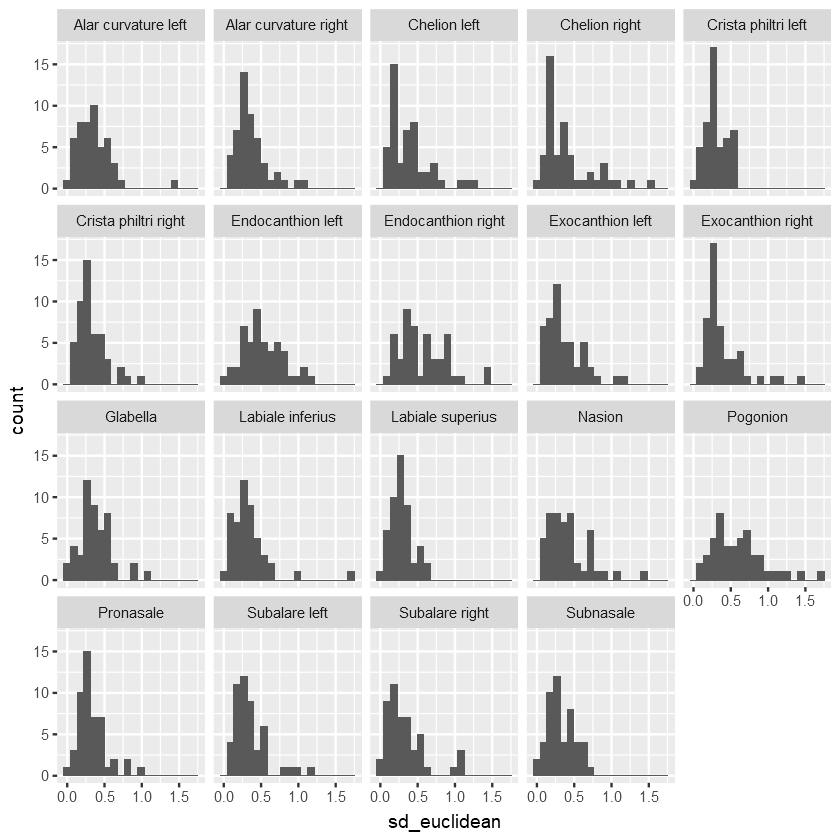

In [13]:
#Without 141789
ggplot(ArslanManualLandmarks[which(ArslanManualLandmarks$IID != 141789),], aes(sd_euclidean))+geom_histogram(bins = 20) + facet_wrap(~Landmark.Name)

It looks like Arslan just has the one person where one of their landmarking iterations is way off - 141789. Now I'm going to calcualate just the standard deviation of the x, y, and z coordinates to see if the same thing shows up. 

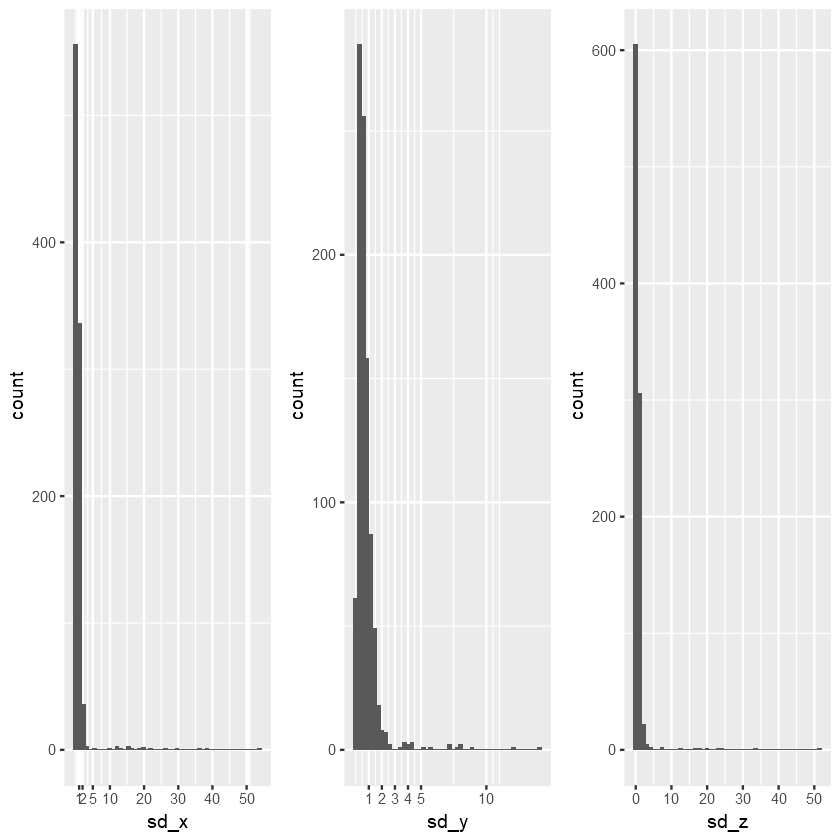

In [14]:
ArslanManualLandmarks$sd_x <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sd(x[c('x_1', 'x_2', 'x_3')]))
ArslanManualLandmarks$sd_y <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sd(x[c('y_1', 'y_2', 'y_3')]))
ArslanManualLandmarks$sd_z <- apply(ArslanManualLandmarks[7:ncol(ArslanManualLandmarks)], 1, function(x) sd(x[c('z_1', 'z_2', 'z_3')]))
sd_x_plot <- ggplot(ArslanManualLandmarks, aes(sd_x))+geom_histogram(bins = 50)+scale_x_continuous(breaks = c(1,2,5,10,20,30,40,50,60))
sd_y_plot <- ggplot(ArslanManualLandmarks, aes(sd_y))+geom_histogram(bins = 50)+scale_x_continuous(breaks = c(1,2,3,4,5,10,15))
sd_z_plot <- ggplot(ArslanManualLandmarks, aes(sd_z))+geom_histogram(bins = 50)
multiplot(sd_x_plot, sd_y_plot, sd_z_plot, cols = 3)

In [15]:
ArslanHighXSD <- ArslanManualLandmarks[which(ArslanManualLandmarks$sd_x >= 5),]
unique(ArslanHighXSD$IID)
unique(ArslanHighXSD$Landmark.Name)

[1] 141789

[1] Glabella             Nasion               Subnasale           
 [4] Labiale superius     Labiale inferius     Pogonion            
 [7] Endocanthion left    Endocanthion right   Exocanthion left    
[10] Exocanthion right    Alar curvature left  Alar curvature right
[13] Subalare left        Subalare right       Crista philtri left 
[16] Crista philtri right Chelion left         Chelion right       
19 Levels: Alar curvature left Alar curvature right ... Subnasale

In [16]:
ArslanHighYSD <- ArslanManualLandmarks[which(ArslanManualLandmarks$sd_y >= 5),]
unique(ArslanHighYSD$IID)
unique(ArslanHighYSD$Landmark.Name)

[1] 141789

[1] Glabella            Nasion              Endocanthion left  
 [4] Endocanthion right  Exocanthion left    Exocanthion right  
 [7] Alar curvature left Subalare left       Crista philtri left
[10] Chelion left       
19 Levels: Alar curvature left Alar curvature right ... Subnasale

In [17]:
ArslanHighZSD <- ArslanManualLandmarks[which(ArslanManualLandmarks$sd_z >= 5),]
unique(ArslanHighZSD$IID)
unique(ArslanHighZSD$Landmark.Name)

[1] 141789

[1] Glabella            Nasion              Subnasale          
 [4] Endocanthion left   Endocanthion right  Exocanthion left   
 [7] Alar curvature left Subalare left       Crista philtri left
[10] Chelion left       
19 Levels: Alar curvature left Alar curvature right ... Subnasale

Well it looks like the problem person is the same - we should keep this in mind and consider removing this person's measures. 

## Julie

In [18]:
JulieManualLandmarks <- read_delim("C:/Users/Julie White/Box Sync/MHC_paper/MHC_analysis/Manual_Landmarking/Julie/JulieManualLandmarks.txt", "\t", escape_double = FALSE, trim_ws = TRUE,)

Parsed with column specification:
cols(
  IID = col_integer(),
  Observer = col_character(),
  Landmark.Number = col_integer(),
  Landmark.Label = col_character(),
  Landmark.Name = col_character(),
  Side = col_character(),
  Notes_1 = col_character(),
  Notes_2 = col_character(),
  Notes_3 = col_character(),
  x_1 = col_double(),
  y_1 = col_double(),
  z_1 = col_double(),
  x_2 = col_double(),
  y_2 = col_double(),
  z_2 = col_double(),
  x_3 = col_double(),
  y_3 = col_double(),
  z_3 = col_double()
)


In [19]:
head(JulieManualLandmarks)
unique(JulieManualLandmarks$Landmark.Name)

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,Notes_1,Notes_2,Notes_3,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3
61549,Julie,1,a,Glabella,Middle,NA,NA,NA,38.55,5.39,102.28,38.34,4.80,102.18,38.66,7.89,102.63
61549,Julie,2,b,Nasion,Middle,NA,NA,NA,37.79,-7.71,99.73,37.50,-6.74,99.81,37.09,-8.25,99.85
61549,Julie,3,c,Pronasale,Middle,NA,NA,NA,36.07,-43.03,122.96,36.21,-43.52,123.00,36.45,-43.71,123.00
61549,Julie,4,d,Subnasale,Middle,NA,NA,NA,34.35,-56.68,108.71,34.73,-55.27,109.89,34.74,-56.60,108.66
61549,Julie,5,e,Labiale superius,Middle,NA,NA,NA,33.75,-72.36,109.51,34.05,-72.88,109.27,33.50,-72.84,109.29
61549,Julie,7,f,Labiale inferius,Middle,NA,NA,NA,34.15,-87.47,104.98,34.10,-87.94,104.72,34.31,-87.07,105.02


[1] "Glabella"             "Nasion"               "Pronasale"           
 [4] "Subnasale"            "Labiale superius"     "Labiale inferius"    
 [7] "Sublabiale"           "Pogonion"             "Endocanthion left"   
[10] "Endocanthion right"   "Exocanthion left"     "Exocanthion right"   
[13] "Alar curvature left"  "Alar curvature right" "Subalare left"       
[16] "Subalare right"       "Crista philtri left"  "Crista philtri right"
[19] "Chelion left"         "Chelion right"

In [20]:
#Calculate the centroid
JulieManualLandmarks$xi <- apply(JulieManualLandmarks[,c(10, 13, 16)], 1, function(x) mean(x,na.rm = TRUE))
JulieManualLandmarks$yi <- apply(JulieManualLandmarks[,c(11, 14, 17)], 1, function(x) mean(x,na.rm = TRUE))
JulieManualLandmarks$zi <- apply(JulieManualLandmarks[,c(12, 15, 18)], 1, function(x) mean(x,na.rm = TRUE))    

#Calculate euclidean distances of each replicate to the centroid
JulieManualLandmarks$euclidean_1 <- apply(JulieManualLandmarks[10:ncol(JulieManualLandmarks)], 1, function(x) sqrt(sum((x[['x_1']] - x[['xi']])^2 + (x[['y_1']] - x[['yi']])^2 + (x[['z_1']] - x[['zi']])^2)))
JulieManualLandmarks$euclidean_2 <- apply(JulieManualLandmarks[10:ncol(JulieManualLandmarks)], 1, function(x) sqrt(sum((x[['x_2']] - x[['xi']])^2 + (x[['y_2']] - x[['yi']])^2 + (x[['z_2']] - x[['zi']])^2)))
JulieManualLandmarks$euclidean_3 <- apply(JulieManualLandmarks[10:ncol(JulieManualLandmarks)], 1, function(x) sqrt(sum((x[['x_3']] - x[['xi']])^2 + (x[['y_3']] - x[['yi']])^2 + (x[['z_3']] - x[['zi']])^2)))

#Calculate the standard deviation of the euclidean distances
JulieManualLandmarks$sd_euclidean <- apply(JulieManualLandmarks[10:ncol(JulieManualLandmarks)], 1, function(x) sd(x[c('euclidean_1', 'euclidean_2', 'euclidean_3')]))

head(JulieManualLandmarks)

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,Notes_1,Notes_2,Notes_3,x_1,...,x_3,y_3,z_3,xi,yi,zi,euclidean_1,euclidean_2,euclidean_3,sd_euclidean
61549,Julie,1,a,Glabella,Middle,NA,NA,NA,38.55,...,38.66,7.89,102.63,38.51667,6.026667,102.36333,0.64296190,1.2528102,1.8877676,0.62244508
61549,Julie,2,b,Nasion,Middle,NA,NA,NA,37.79,...,37.09,-8.25,99.85,37.46000,-7.566667,99.79667,0.36590831,0.8277412,0.7789024,0.25371867
61549,Julie,3,c,Pronasale,Middle,NA,NA,NA,36.07,...,36.45,-43.71,123.00,36.24333,-43.420000,122.98667,0.42761613,0.1062492,0.3563550,0.16877390
61549,Julie,4,d,Subnasale,Middle,NA,NA,NA,34.35,...,34.74,-56.60,108.66,34.60667,-56.183333,109.08667,0.67411671,1.2225929,0.6110919,0.33633605
61549,Julie,5,e,Labiale superius,Middle,NA,NA,NA,33.75,...,33.50,-72.84,109.29,33.76667,-72.693333,109.35667,0.36728735,0.3501904,0.3115552,0.02855127
61549,Julie,7,f,Labiale inferius,Middle,NA,NA,NA,34.15,...,34.31,-87.07,105.02,34.18667,-87.493333,104.90667,0.08524475,0.4917994,0.4552655,0.22492102


In [21]:
summary(JulieManualLandmarks$euclidean_1)
summary(JulieManualLandmarks$euclidean_2)
summary(JulieManualLandmarks$euclidean_3)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01247  0.31810  0.58019  1.23854  1.00754 34.55322 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01528  0.30690  0.50387  1.61207  0.82905 69.99988 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.02055  0.30795  0.49674  1.08918  0.82366 35.45283 

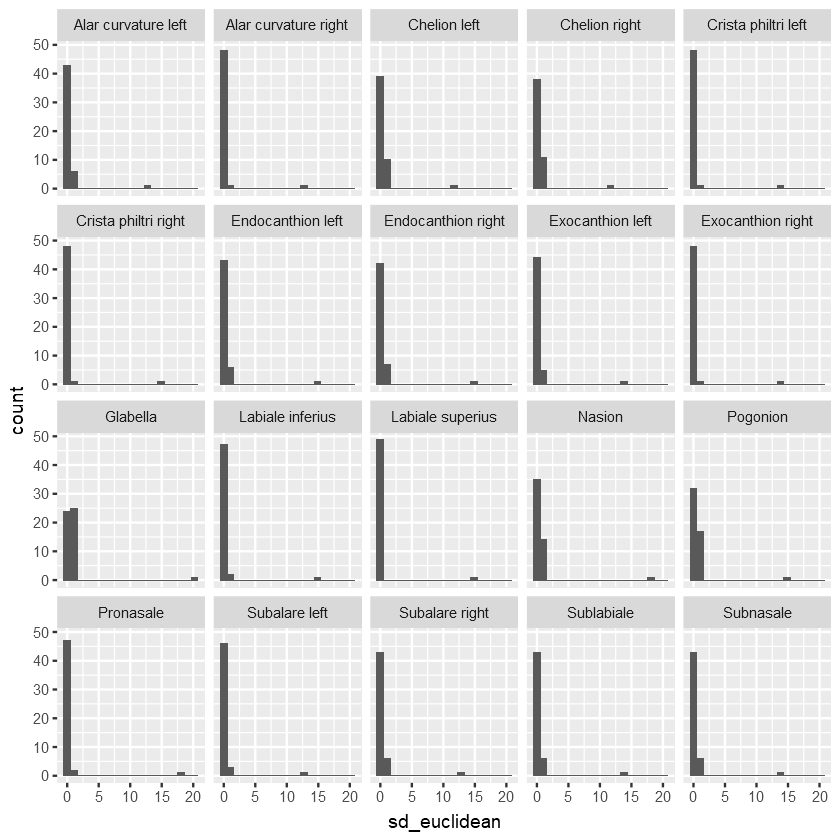

In [22]:
ggplot(JulieManualLandmarks, aes(sd_euclidean))+geom_histogram(bins = 20) + facet_wrap(~Landmark.Name)

62630 has really high euclidean distance for me

In [23]:
JulieHighEuclideanSD <- JulieManualLandmarks[which(JulieManualLandmarks$sd_euclidean >= 5),]
head(JulieHighEuclideanSD)
unique(JulieHighEuclideanSD$IID)
unique(JulieHighEuclideanSD$Landmark.Name)

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,Notes_1,Notes_2,Notes_3,x_1,...,x_3,y_3,z_3,xi,yi,zi,euclidean_1,euclidean_2,euclidean_3,sd_euclidean
62630,Julie,1,a,Glabella,Middle,NA,NA,NA,-18.21,...,-19.07,33.46,-91.66,-19.43000,29.333333,-56.450000,34.55322,69.99988,35.45283,20.21045
62630,Julie,2,b,Nasion,Middle,NA,NA,NA,-18.79,...,-18.83,28.64,-81.01,-19.44667,20.676667,-49.083333,30.58859,63.49904,32.91059,18.36728
62630,Julie,3,c,Pronasale,Middle,NA,NA,NA,-20.67,...,-21.17,29.70,-32.64,-21.25667,8.506667,-12.040000,32.35493,61.90152,29.55545,17.92161
62630,Julie,4,d,Subnasale,Middle,NA,NA,NA,-20.45,...,-21.31,9.87,-29.39,-20.81667,-10.196667,-14.720000,23.52403,48.37792,24.86209,13.97915
62630,Julie,5,e,Labiale superius,Middle,NA,NA,NA,-20.73,...,-20.87,6.07,-14.87,-20.49000,-17.120000,-4.610000,25.51080,50.87162,25.36115,14.68546
62630,Julie,7,f,Labiale inferius,Middle,NA,NA,NA,-19.92,...,-20.65,-4.40,-1.23,-20.28000,-29.236667,3.016667,25.30366,50.49815,25.19982,14.57611


[1] 62630

[1] "Glabella"             "Nasion"               "Pronasale"           
 [4] "Subnasale"            "Labiale superius"     "Labiale inferius"    
 [7] "Sublabiale"           "Pogonion"             "Endocanthion left"   
[10] "Endocanthion right"   "Exocanthion left"     "Exocanthion right"   
[13] "Alar curvature left"  "Alar curvature right" "Subalare left"       
[16] "Subalare right"       "Crista philtri left"  "Crista philtri right"
[19] "Chelion left"         "Chelion right"

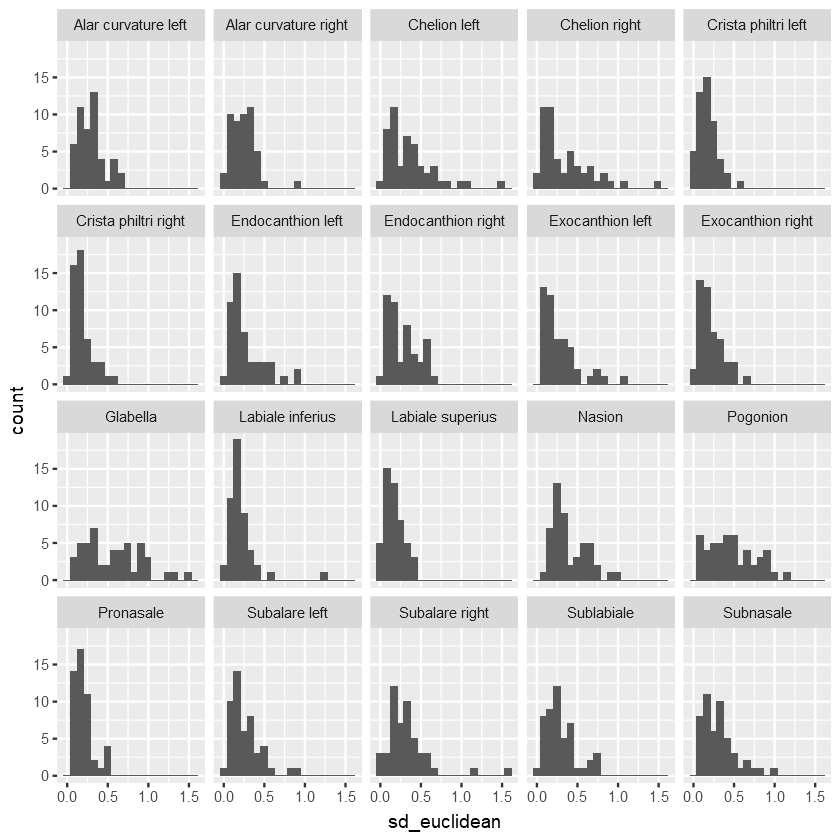

In [24]:
ggplot(JulieManualLandmarks[which(JulieManualLandmarks$IID != 62630),], aes(sd_euclidean))+geom_histogram(bins = 20) + facet_wrap(~Landmark.Name)

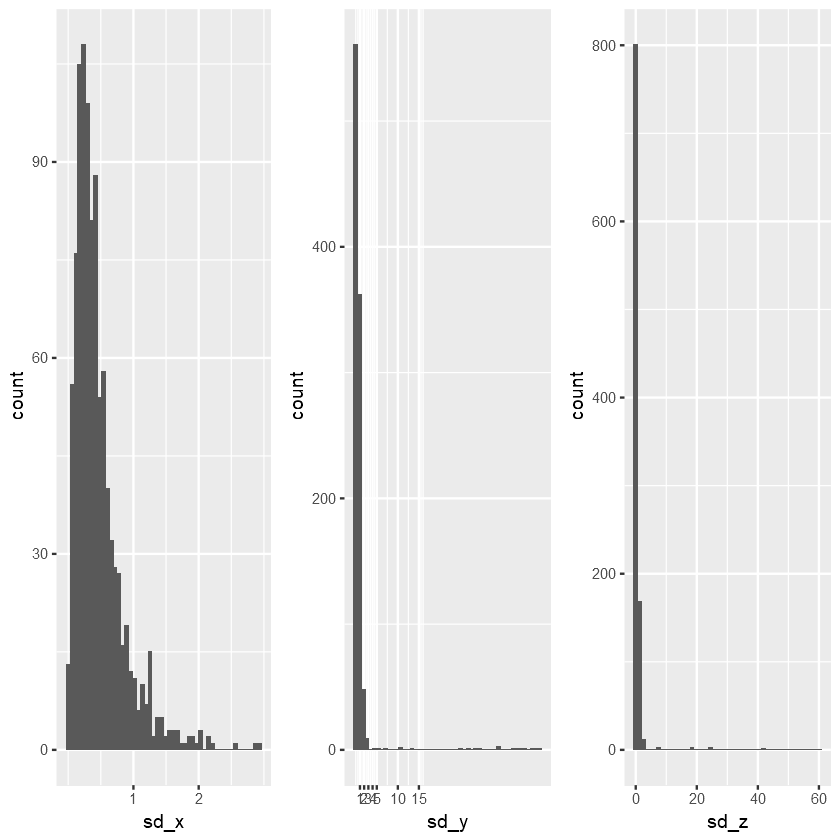

In [25]:
JulieManualLandmarks$sd_x <- apply(JulieManualLandmarks[7:ncol(JulieManualLandmarks)], 1, function(x) sd(x[c('x_1', 'x_2', 'x_3')]))
JulieManualLandmarks$sd_y <- apply(JulieManualLandmarks[7:ncol(JulieManualLandmarks)], 1, function(x) sd(x[c('y_1', 'y_2', 'y_3')]))
JulieManualLandmarks$sd_z <- apply(JulieManualLandmarks[7:ncol(JulieManualLandmarks)], 1, function(x) sd(x[c('z_1', 'z_2', 'z_3')]))
sd_x_plot <- ggplot(JulieManualLandmarks, aes(sd_x))+geom_histogram(bins = 50)+scale_x_continuous(breaks = c(1,2,5,10,20,30,40,50,60))
sd_y_plot <- ggplot(JulieManualLandmarks, aes(sd_y))+geom_histogram(bins = 50)+scale_x_continuous(breaks = c(1,2,3,4,5,10,15))
sd_z_plot <- ggplot(JulieManualLandmarks, aes(sd_z))+geom_histogram(bins = 50)
multiplot(sd_x_plot, sd_y_plot, sd_z_plot, cols = 3)

In [26]:
JulieHighXSD <- JulieManualLandmarks[which(JulieManualLandmarks$sd_x >= 5),]
unique(JulieHighXSD$IID)
head(JulieHighXSD)

integer(0)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IID,Observer,Landmark.Number,Landmark.Label,Landmark.Name,Side,Notes_1,Notes_2,Notes_3,x_1,...,xi,yi,zi,euclidean_1,euclidean_2,euclidean_3,sd_euclidean,sd_x,sd_y,sd_z


In [27]:
JulieHighYSD <- JulieManualLandmarks[which(JulieManualLandmarks$sd_y >= 5),]
unique(JulieHighYSD$IID)

[1] 62630

In [28]:
JulieHighZSD <- JulieManualLandmarks[which(JulieManualLandmarks$sd_z >= 5),]
unique(JulieHighZSD$IID)

[1] 62630

So 62630 has high Y and Z values, we should consider removing this person.

## SD by Landmark, still with raters separated

In [29]:
ArslanSDbyLandmark <- ddply(.data = ArslanManualLandmarks[which(ArslanManualLandmarks$IID != '141789'),], ~ Landmark.Name , summarize, Arslan_euclidean_sd = mean(sd_euclidean), Arslan_x_sd = mean(sd_x), Arslan_y_sd = mean(sd_y), Arslan_z_sd = mean(sd_z))
JulieSDbyLandmark <- ddply(.data = JulieManualLandmarks[which(JulieManualLandmarks$IID != '62630'), ], ~ Landmark.Name , summarize, Julie_euclidean_sd = mean(sd_euclidean), Julie_x_sd = mean(sd_x), Julie_y_sd = mean(sd_y), Julie_z_sd = mean(sd_z))

In [30]:
SDbyLandmark <- merge(ArslanSDbyLandmark, JulieSDbyLandmark, by='Landmark.Name', all=TRUE)
SDbyLandmark$Landmark.Name <- as.character(SDbyLandmark$Landmark.Name)
rbind(SDbyLandmark, c('AverageForAllLandmarks', colMeans(SDbyLandmark[,-1],na.rm=TRUE)))

Landmark.Name,Arslan_euclidean_sd,Arslan_x_sd,Arslan_y_sd,Arslan_z_sd,Julie_euclidean_sd,Julie_x_sd,Julie_y_sd,Julie_z_sd
Alar curvature left,0.347791863564028,0.207719573349599,0.672430891635965,0.841735996141482,0.284052560107064,0.161660415749019,0.534156253619829,0.62893521808505
Alar curvature right,0.36803601741593,0.216726498113083,0.729692253252755,0.895969347341809,0.242173045348308,0.133043222889227,0.473922641481094,0.538447372895207
Chelion left,0.379515949263356,0.823258199454745,0.566929207755229,0.425746912706225,0.363580652482072,0.71517395247342,0.370644785153593,0.356059421938272
Chelion right,0.400472342681955,0.791835854496734,0.523384253708037,0.49241959795451,0.345851021170269,0.739186271239699,0.354565316155354,0.416418054635546
Crista philtri left,0.300679272855029,0.544987156253751,0.652177776808658,0.310513081813804,0.176427376034154,0.430108851152528,0.300232568237879,0.174607888643131
Crista philtri right,0.326449174355286,0.563940454621564,0.686270827591437,0.37148408754065,0.184591029057566,0.449071410104909,0.259822458359808,0.168035755247093
Endocanthion left,0.518841730042448,0.901892856312407,0.585145238120891,0.700723036702326,0.265517716854069,0.516514170921717,0.388536176993357,0.365737381180079
Endocanthion right,0.556761033894979,1.13454232004773,0.48950512781534,0.644201607082859,0.28434119390559,0.548742431923222,0.361229637608185,0.395918609937719
Exocanthion left,0.364639700203342,0.668528246149365,0.492265884658986,0.52290101414725,0.276145951325269,0.520746680834502,0.405282375556403,0.378573114869566
Exocanthion right,0.397305373711781,0.743387175476525,0.578768276293333,0.589081233626222,0.217740171577509,0.443273058744986,0.324676890535749,0.351334425500902


These might be slightly high - in John Starbuck's asymmetry paper he had mean measurement error of 0.26 along the x-dimension, 0.30 along the y-dimension and 0.31 along the z-dimension.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

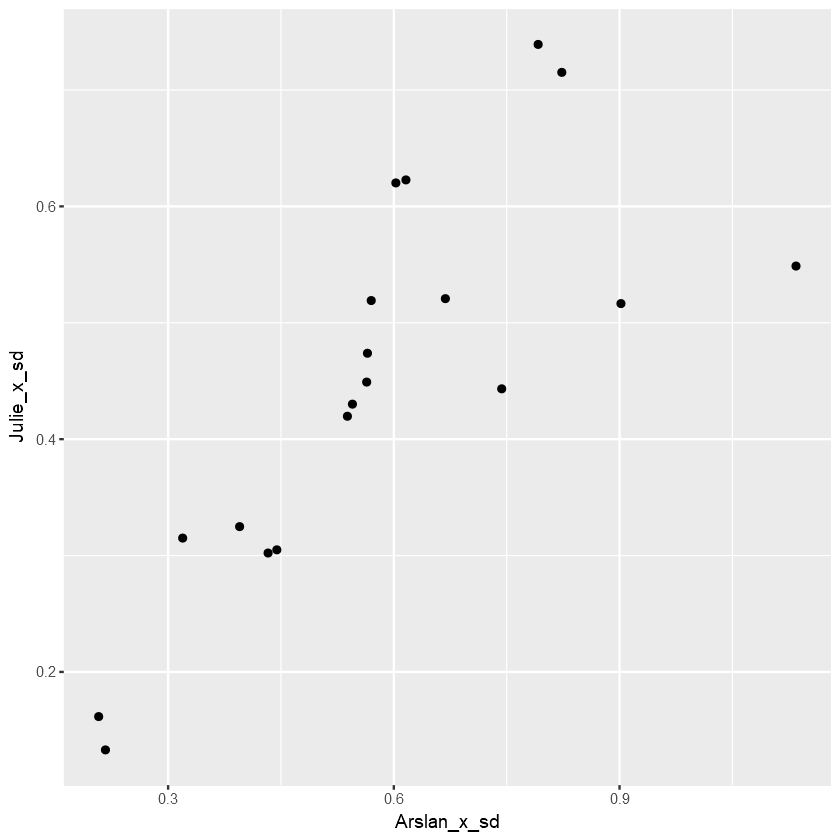

In [31]:
ggplot(SDbyLandmark, aes(Arslan_x_sd, Julie_x_sd))+geom_point()

# Error measures on linear distances

In [32]:
DistancesToCalculate <- read.table("C:\\Users\\Julie White\\Box Sync\\MHC_paper\\MHC_analysis\\Manual_Landmarking\\LinearDistancesToCalculate.txt", sep = "\t", header = F, colClasses="character")
head(DistancesToCalculate)

V1,V2,V3,V4,V5
1,Glabella,Endocanthion left,Glabella-Endocanthion left,Glabella-Endocanthion_left
2,Glabella,Exocanthion left,Glabella-Exocanthion left,Glabella-Exocanthion_left
3,Glabella,Alar curvature left,Glabella-Alar curvature left,Glabella-AlarCurvature_left
4,Glabella,Subalare left,Glabella-Subalare left,Glabella-Subalare_left
5,Glabella,Crista philtri left,Glabella-Crista philtri left,Glabella-CristaPhiltri_left
6,Glabella,Chelion left,Glabella-Chelion left,Glabella-Chelion_left


In [33]:
ArslanLinearDistances <- matrix(NA, nrow = length(unique(JulieManualLandmarks$IID)), ncol = 3*length(DistancesToCalculate$V4))
rownames(ArslanLinearDistances) <- as.character(unique(JulieManualLandmarks$IID))
colnames(ArslanLinearDistances) <- c(paste(DistancesToCalculate$V4, "_1", sep = ""), paste(DistancesToCalculate$V4,"_2",sep=""), paste(DistancesToCalculate$V4,"_3",sep=""))

In [34]:
EuclideanDistance <- function(x1,x2,y1,y2,z1,z2){sqrt(sum((x1-x2)^2+(y1-y2)^2+(z1-z2)^2))}

for (i in 1:ncol(ArslanLinearDistances)){ #Iterations x Pairwise distances
    if (i <= 84){
        for (j in 1:nrow(ArslanLinearDistances)){ #People
            Landmark1 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i,2]),] 
            Landmark2 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i,3]),]
            ArslanLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_1, Landmark2$x_1, Landmark1$y_1, Landmark2$y_1, Landmark1$z_1, Landmark2$z_1) 
        }
    } else if (i > 84 & i <= 168){
        for (j in 1:nrow(ArslanLinearDistances)){ #People
            Landmark1 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i-84,2]),] 
            Landmark2 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i-84,3]),]
            ArslanLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_2, Landmark2$x_2, Landmark1$y_2, Landmark2$y_2, Landmark1$z_2, Landmark2$z_2)
        }
    } else if (i > 168 & i <= 252){
        for (j in 1:nrow(ArslanLinearDistances)){ #People
            Landmark1 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i-168,2]),] 
            Landmark2 <- ArslanManualLandmarks[(ArslanManualLandmarks$IID == rownames(ArslanLinearDistances)[j]) & (ArslanManualLandmarks$Landmark.Name == DistancesToCalculate[i-168,3]),]
            ArslanLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_3, Landmark2$x_3, Landmark1$y_3, Landmark2$y_3, Landmark1$z_3, Landmark2$z_3) 
        }
    } else {
        print("Something wrong")
    }
}

In [35]:
rownames(ArslanLinearDistances) <- paste(rownames(ArslanLinearDistances), "_AZ", sep="")

In [36]:
JulieLinearDistances <- matrix(NA, nrow = length(unique(JulieManualLandmarks$IID)), ncol = 3*length(DistancesToCalculate$V4))
rownames(JulieLinearDistances) <- as.character(unique(JulieManualLandmarks$IID))
colnames(JulieLinearDistances) <- c(paste(DistancesToCalculate$V4, "_1", sep = ""), paste(DistancesToCalculate$V4,"_2",sep=""), paste(DistancesToCalculate$V4,"_3",sep=""))

In [37]:
for (i in 1:ncol(JulieLinearDistances)){ #Iterations x Pairwise distances
    if (i <= 84){
        for (j in 1:nrow(JulieLinearDistances)){ #People
            Landmark1 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i,2]),] 
            Landmark2 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i,3]),]
            JulieLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_1, Landmark2$x_1, Landmark1$y_1, Landmark2$y_1, Landmark1$z_1, Landmark2$z_1) 
        }
    } else if (i > 84 & i <= 168){
        for (j in 1:nrow(JulieLinearDistances)){ #People
            Landmark1 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i-84,2]),] 
            Landmark2 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i-84,3]),]
            JulieLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_2, Landmark2$x_2, Landmark1$y_2, Landmark2$y_2, Landmark1$z_2, Landmark2$z_2)
        }
    } else if (i > 168 & i <= 252){
        for (j in 1:nrow(JulieLinearDistances)){ #People
            Landmark1 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i-168,2]),] 
            Landmark2 <- JulieManualLandmarks[(JulieManualLandmarks$IID == rownames(JulieLinearDistances)[j]) & (JulieManualLandmarks$Landmark.Name == DistancesToCalculate[i-168,3]),]
            JulieLinearDistances[j,i] <- EuclideanDistance(Landmark1$x_3, Landmark2$x_3, Landmark1$y_3, Landmark2$y_3, Landmark1$z_3, Landmark2$z_3) 
        }
    } else {
        print("Something wrong")
    }
}

In [38]:
rownames(JulieLinearDistances) <- paste(rownames(JulieLinearDistances), "_JW", sep="")
ArslanJulieLinearDistances <- rbind(ArslanLinearDistances, JulieLinearDistances)
head(ArslanJulieLinearDistances)

,Glabella-Endocanthion left_1,Glabella-Exocanthion left_1,Glabella-Alar curvature left_1,Glabella-Subalare left_1,Glabella-Crista philtri left_1,Glabella-Chelion left_1,Nasion-Endocanthion left_1,Nasion-Exocanthion left_1,Nasion-Alar curvature left_1,Nasion-Subalare left_1,...,Labiale inferius-Alar curvature right_3,Labiale inferius-Subalare right_3,Labiale inferius-Crista philtri right_3,Labiale inferius-Chelion right_3,Pogonion-Endocanthion right_3,Pogonion-Exocanthion right_3,Pogonion-Alar curvature right_3,Pogonion-Subalare right_3,Pogonion-Crista philtri right_3,Pogonion-Chelion right_3
61549_AZ,29.22070,50.32168,56.14915,60.00124,75.54780,85.62764,20.97578,46.31651,42.92891,46.46342,...,43.57145,37.39693,16.81842,27.97522,90.44986,99.6797,61.82614,55.23818,36.84822,36.38248
61587_AZ,35.04241,54.09900,65.97761,70.98830,85.46911,95.90157,22.64774,47.98777,50.53568,55.35410,...,41.07630,34.05872,15.96527,25.39126,93.12678,103.2633,58.82323,51.99771,35.62768,34.18609
61622_AZ,33.55509,57.76176,62.83999,67.77484,85.00070,98.29287,26.46938,53.61510,52.22175,56.78009,...,43.62116,35.22650,15.05687,28.55446,100.57673,109.7196,64.56194,56.80109,36.40533,39.02311
62102_AZ,31.56701,53.58856,56.49476,60.98363,73.68632,91.37549,26.86152,51.90056,48.77272,52.92580,...,46.78999,38.22817,19.01189,29.52407,94.63821,103.2781,65.05082,57.13242,40.41228,36.77224
62588_AZ,35.12833,59.16621,61.73646,65.29445,78.42806,94.49643,22.39418,52.12898,44.34792,47.36863,...,47.34262,38.42168,18.98187,31.85030,93.37954,105.3571,62.84705,54.48625,36.16658,37.73129
62630_AZ,31.03963,54.53311,58.08496,61.85793,76.40494,90.42820,24.47200,52.46595,48.12774,51.51646,...,44.26158,37.07731,18.87984,26.79126,93.55181,108.2885,62.52856,55.79456,39.23662,35.88878


In [39]:
SDofSideReplicates <- as.data.frame(matrix(nrow=100, ncol=84))
colnames(SDofSideReplicates) <- paste(DistancesToCalculate$V4, "_sd")
rownames(SDofSideReplicates) <- rownames(ArslanJulieLinearDistances)

for (i in 1:84){
    SDofSideReplicates[i] <- apply(ArslanJulieLinearDistances, 1, function(x) sd(x[c(i,i+84,i+168)]))
}

head(SDofSideReplicates)

,Glabella-Endocanthion left _sd,Glabella-Exocanthion left _sd,Glabella-Alar curvature left _sd,Glabella-Subalare left _sd,Glabella-Crista philtri left _sd,Glabella-Chelion left _sd,Nasion-Endocanthion left _sd,Nasion-Exocanthion left _sd,Nasion-Alar curvature left _sd,Nasion-Subalare left _sd,...,Labiale inferius-Alar curvature right _sd,Labiale inferius-Subalare right _sd,Labiale inferius-Crista philtri right _sd,Labiale inferius-Chelion right _sd,Pogonion-Endocanthion right _sd,Pogonion-Exocanthion right _sd,Pogonion-Alar curvature right _sd,Pogonion-Subalare right _sd,Pogonion-Crista philtri right _sd,Pogonion-Chelion right _sd
61549_AZ,2.0137424,1.7812787,1.7034488,1.9692929,3.2809684,3.7436005,1.2834312,0.3703349,0.1666371,0.2292711,...,0.9662820,0.4725225,2.3465616,2.8957198,1.4882479,1.7305891,0.2846501,0.4843056,1.940666,1.6341867
61587_AZ,1.4231351,1.6030462,1.3525846,1.4736808,2.0873444,1.2556514,1.1697658,0.4592153,2.8548232,2.1132152,...,0.4928647,0.2410594,1.2347797,1.7679187,0.9272427,1.3557571,0.9569209,0.7368404,1.510667,0.6088937
61622_AZ,1.0194892,1.8755477,0.8490116,0.3082779,0.7643198,0.6198631,0.9692428,2.0868335,1.2753037,1.3879625,...,0.5798076,1.0572277,0.7330346,0.8202753,2.0198134,0.3078606,2.7236568,2.6104050,3.003604,2.0451564
62102_AZ,0.4296362,1.2034952,0.3942614,0.7697408,1.9397033,0.6496339,0.3439958,1.1812554,0.4062658,0.4116249,...,0.8088600,0.2130291,2.6677922,0.5583077,1.5715586,1.9083476,1.5657196,1.0346090,3.236128,2.0003900
62588_AZ,0.6585958,1.1232323,0.4352632,0.8050116,2.0440507,0.4045505,1.0897918,0.9560836,0.2382106,0.9811893,...,1.3378617,0.2415074,0.7769623,2.5285731,2.2951046,2.3126730,2.0482448,2.0861553,2.741430,2.7166170
62630_AZ,1.1081048,0.5671986,0.6990446,0.8591872,2.1617492,1.7869199,0.3360134,0.6540391,0.6893812,0.4628402,...,0.8952669,0.5125946,2.1351391,0.7330945,0.9562777,0.6941365,0.2488767,0.4413379,1.887321,0.3335718


No id variables; using all as measure variables


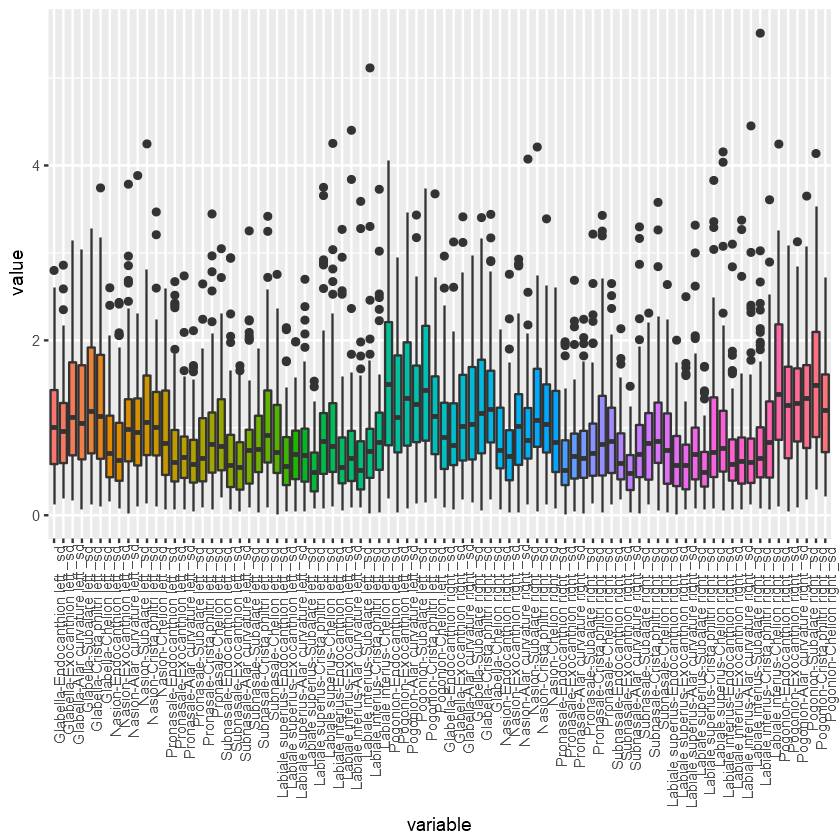

In [40]:
ggplot(data = melt(SDofSideReplicates), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable)) + theme(legend.position="none") + theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [41]:
SDofSideReplicates <- rbind(c(colMeans(SDofSideReplicates,na.rm=TRUE)), SDofSideReplicates)
row.names(SDofSideReplicates)[1] <- "AverageSD"
head(SDofSideReplicates)

,Glabella-Endocanthion left _sd,Glabella-Exocanthion left _sd,Glabella-Alar curvature left _sd,Glabella-Subalare left _sd,Glabella-Crista philtri left _sd,Glabella-Chelion left _sd,Nasion-Endocanthion left _sd,Nasion-Exocanthion left _sd,Nasion-Alar curvature left _sd,Nasion-Subalare left _sd,...,Labiale inferius-Alar curvature right _sd,Labiale inferius-Subalare right _sd,Labiale inferius-Crista philtri right _sd,Labiale inferius-Chelion right _sd,Pogonion-Endocanthion right _sd,Pogonion-Exocanthion right _sd,Pogonion-Alar curvature right _sd,Pogonion-Subalare right _sd,Pogonion-Crista philtri right _sd,Pogonion-Chelion right _sd
AverageSD,1.0700385,1.011299,1.2228402,1.1806112,1.2916768,1.2677681,0.8113628,0.7906363,1.0497436,1.0184352,...,0.7148453,0.7645621,0.8517818,0.9611196,1.4799397,1.2503890,1.3402951,1.3625483,1.530145,1.1999799
61549_AZ,2.0137424,1.781279,1.7034488,1.9692929,3.2809684,3.7436005,1.2834312,0.3703349,0.1666371,0.2292711,...,0.9662820,0.4725225,2.3465616,2.8957198,1.4882479,1.7305891,0.2846501,0.4843056,1.940666,1.6341867
61587_AZ,1.4231351,1.603046,1.3525846,1.4736808,2.0873444,1.2556514,1.1697658,0.4592153,2.8548232,2.1132152,...,0.4928647,0.2410594,1.2347797,1.7679187,0.9272427,1.3557571,0.9569209,0.7368404,1.510667,0.6088937
61622_AZ,1.0194892,1.875548,0.8490116,0.3082779,0.7643198,0.6198631,0.9692428,2.0868335,1.2753037,1.3879625,...,0.5798076,1.0572277,0.7330346,0.8202753,2.0198134,0.3078606,2.7236568,2.6104050,3.003604,2.0451564
62102_AZ,0.4296362,1.203495,0.3942614,0.7697408,1.9397033,0.6496339,0.3439958,1.1812554,0.4062658,0.4116249,...,0.8088600,0.2130291,2.6677922,0.5583077,1.5715586,1.9083476,1.5657196,1.0346090,3.236128,2.0003900
62588_AZ,0.6585958,1.123232,0.4352632,0.8050116,2.0440507,0.4045505,1.0897918,0.9560836,0.2382106,0.9811893,...,1.3378617,0.2415074,0.7769623,2.5285731,2.2951046,2.3126730,2.0482448,2.0861553,2.741430,2.7166170


Average left and right replicates, then get the SD between the left and right. 

In [42]:
LeftRightAvgDist <- as.data.frame(matrix(nrow=100, ncol=84))
colnames(LeftRightAvgDist) <- paste(DistancesToCalculate$V4, " Avg")
rownames(LeftRightAvgDist) <- rownames(ArslanJulieLinearDistances)

for (i in 1:84){
    LeftRightAvgDist[i] <- apply(ArslanJulieLinearDistances, 1, function(x) mean(x[c(i,i+84,i+168)]))
}

head(LeftRightAvgDist)

,Glabella-Endocanthion left Avg,Glabella-Exocanthion left Avg,Glabella-Alar curvature left Avg,Glabella-Subalare left Avg,Glabella-Crista philtri left Avg,Glabella-Chelion left Avg,Nasion-Endocanthion left Avg,Nasion-Exocanthion left Avg,Nasion-Alar curvature left Avg,Nasion-Subalare left Avg,...,Labiale inferius-Alar curvature right Avg,Labiale inferius-Subalare right Avg,Labiale inferius-Crista philtri right Avg,Labiale inferius-Chelion right Avg,Pogonion-Endocanthion right Avg,Pogonion-Exocanthion right Avg,Pogonion-Alar curvature right Avg,Pogonion-Subalare right Avg,Pogonion-Crista philtri right Avg,Pogonion-Chelion right Avg
61549_AZ,31.45839,52.18549,57.72691,61.76923,78.98799,89.67898,20.71606,46.66012,42.74342,46.45251,...,44.67504,37.94186,19.44389,27.17471,92.13663,101.6768,62.13381,55.72608,39.01600,36.66580
61587_AZ,34.16076,52.79288,64.42334,69.54713,84.16449,95.08389,22.86049,47.52804,49.02830,53.88651,...,40.65959,33.82602,17.36074,23.60520,93.82252,104.5067,58.55876,52.11067,37.24801,33.93965
61622_AZ,34.59660,57.55127,62.29928,67.59406,84.93917,97.76817,27.50718,53.74961,50.84835,55.61135,...,44.23829,35.96740,15.84254,29.05554,102.72331,110.0235,67.52380,59.79116,39.47983,41.28656
62102_AZ,32.05656,53.84065,56.94218,61.79392,75.91831,92.10801,26.53223,51.67784,48.35679,52.83343,...,47.59098,38.45818,21.74935,28.95030,96.20394,104.8434,66.39654,57.94918,43.03757,38.26860
62588_AZ,35.86263,58.95205,61.80944,66.18453,80.77541,94.95481,23.29632,51.80930,44.19774,47.97514,...,45.82518,38.40393,19.74606,30.16224,95.00843,106.4174,62.19301,55.19158,37.80963,37.78502
62630_AZ,31.79292,54.69292,58.85058,62.81704,78.90108,92.33675,24.42945,51.76396,48.31793,51.96590,...,44.02134,37.16703,19.74447,26.59848,94.65435,109.0139,62.67188,56.28110,40.52295,36.18655


In [43]:
LeftRightAvgSD <- as.data.frame(matrix(nrow=100, ncol=42))
colnames(LeftRightAvgSD) <- setdiff(unlist(strsplit(DistancesToCalculate$V5, split = "_")[1:42]), "left")
rownames(LeftRightAvgSD) <- rownames(ArslanJulieLinearDistances)

for (i in 1:42){
    LeftRightAvgSD[i] <- apply(LeftRightAvgDist, 1, function(x) sd(x[c(i,i+42)]))
}

head(LeftRightAvgSD)

,Glabella-Endocanthion,Glabella-Exocanthion,Glabella-AlarCurvature,Glabella-Subalare,Glabella-CristaPhiltri,Glabella-Chelion,Nasion-Endocanthion,Nasion-Exocanthion,Nasion-AlarCurvature,Nasion-Subalare,...,LabialeInferius-AlarCurvature,LabialeInferius-Subalare,LabialeInferius-CristaPhiltri,LabialeInferius-Chelion,Pogonion-Endocanthion,Pogonion-Exocanthion,Pogonion-AlarCurvature,Pogonion-Subalare,Pogonion-CristaPhiltri,Pogonion-Chelion
61549_AZ,0.14247303,1.3146354,0.59993190,0.80267748,0.14142102,0.4802269,0.2454157,1.16771444,0.8357044,0.915359585,...,0.9575386,1.2914593,0.62334036,0.62148668,0.50773609,1.1411785,0.12879002,0.6335023,0.01410799,0.27184920
61587_AZ,0.33599177,0.2333165,0.47309688,0.25516794,0.13487855,0.6059737,0.5814502,0.59017135,0.7392753,0.440855580,...,1.1655687,1.0517262,0.31213319,1.35087518,1.24234103,1.1684032,1.06637902,0.7497619,0.10015743,0.59732225
61622_AZ,0.23265497,1.0775718,0.09855563,0.42231883,0.24063966,0.2611199,0.3474504,0.20388187,0.6377646,0.785140234,...,0.4369082,0.6980299,0.05456242,0.26632595,0.76668685,0.1918301,0.60340887,0.8097187,0.04106100,0.38346519
62102_AZ,0.29294522,1.2871381,1.05421294,0.01776105,0.01267028,1.2158556,0.8306689,0.71939312,1.7509886,0.531467801,...,2.3450941,1.1549733,0.72659798,0.04682452,1.26640306,0.5740457,1.97626305,0.5617884,0.14433836,0.05888233
62588_AZ,0.05753464,0.5383537,0.12891075,0.02172568,0.05809839,0.1629641,0.5084270,0.04181567,0.1322475,0.002448935,...,0.6707810,0.4976971,0.03568558,0.46654109,0.01918033,0.3790964,1.34126344,1.0813559,0.42302243,2.06306174
62630_AZ,0.51816960,0.6486358,0.74806051,1.05541205,0.63614900,0.6248941,0.4372887,0.46818762,0.7167485,1.042967030,...,0.2685661,0.4860548,0.43410111,0.60551274,0.16963463,0.5699368,0.07162331,0.3099386,0.33599063,0.22626190


No id variables; using all as measure variables


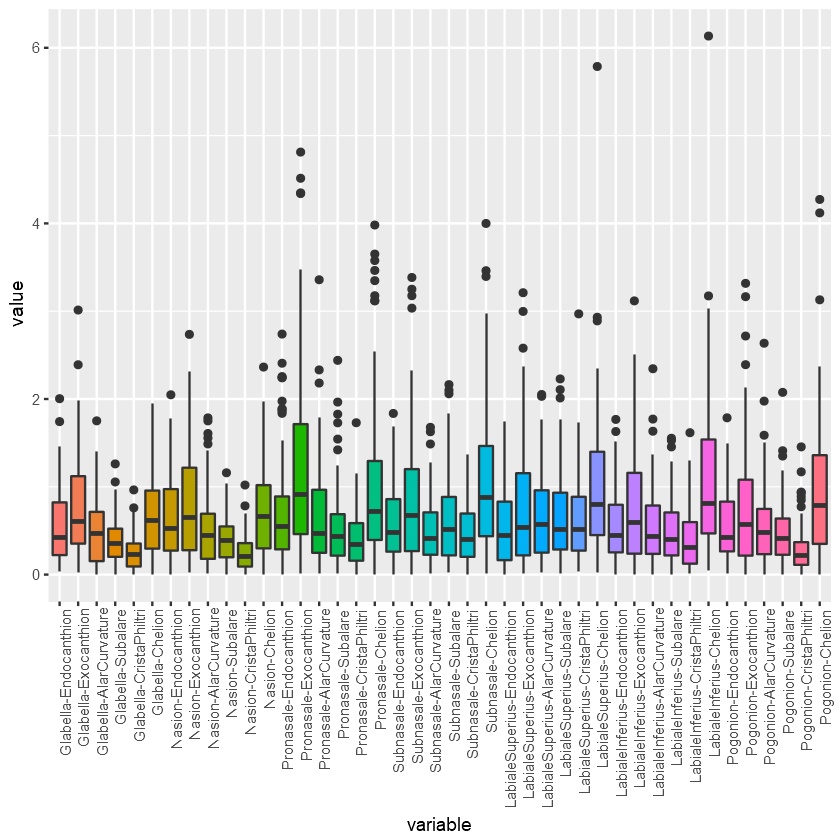

In [44]:
ggplot(data = melt(LeftRightAvgSD), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable)) + theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1))

In [45]:
LeftRightAvgSD <- rbind(c(colMeans(LeftRightAvgSD,na.rm=TRUE)), LeftRightAvgSD)
row.names(LeftRightAvgSD)[1] <- "AverageSD"
head(LeftRightAvgSD)

,Glabella-Endocanthion,Glabella-Exocanthion,Glabella-AlarCurvature,Glabella-Subalare,Glabella-CristaPhiltri,Glabella-Chelion,Nasion-Endocanthion,Nasion-Exocanthion,Nasion-AlarCurvature,Nasion-Subalare,...,LabialeInferius-AlarCurvature,LabialeInferius-Subalare,LabialeInferius-CristaPhiltri,LabialeInferius-Chelion,Pogonion-Endocanthion,Pogonion-Exocanthion,Pogonion-AlarCurvature,Pogonion-Subalare,Pogonion-CristaPhiltri,Pogonion-Chelion
AverageSD,0.53624884,0.7520375,0.48763431,0.38641417,0.24392393,0.6683582,0.6526868,0.79355665,0.5087121,0.400833539,...,0.5623883,0.4893954,0.39680375,1.10256957,0.56621748,0.7548404,0.5402648,0.4666323,0.28610635,0.93980964
61549_AZ,0.14247303,1.3146354,0.59993190,0.80267748,0.14142102,0.4802269,0.2454157,1.16771444,0.8357044,0.915359585,...,0.9575386,1.2914593,0.62334036,0.62148668,0.50773609,1.1411785,0.1287900,0.6335023,0.01410799,0.27184920
61587_AZ,0.33599177,0.2333165,0.47309688,0.25516794,0.13487855,0.6059737,0.5814502,0.59017135,0.7392753,0.440855580,...,1.1655687,1.0517262,0.31213319,1.35087518,1.24234103,1.1684032,1.0663790,0.7497619,0.10015743,0.59732225
61622_AZ,0.23265497,1.0775718,0.09855563,0.42231883,0.24063966,0.2611199,0.3474504,0.20388187,0.6377646,0.785140234,...,0.4369082,0.6980299,0.05456242,0.26632595,0.76668685,0.1918301,0.6034089,0.8097187,0.04106100,0.38346519
62102_AZ,0.29294522,1.2871381,1.05421294,0.01776105,0.01267028,1.2158556,0.8306689,0.71939312,1.7509886,0.531467801,...,2.3450941,1.1549733,0.72659798,0.04682452,1.26640306,0.5740457,1.9762631,0.5617884,0.14433836,0.05888233
62588_AZ,0.05753464,0.5383537,0.12891075,0.02172568,0.05809839,0.1629641,0.5084270,0.04181567,0.1322475,0.002448935,...,0.6707810,0.4976971,0.03568558,0.46654109,0.01918033,0.3790964,1.3412634,1.0813559,0.42302243,2.06306174


# Morpho PLS Analysis

Need to create a new dataframe with the data in MorphoJ format. 

In [46]:
JulieMorphoLandmarks <- as.data.frame(matrix(nrow=150, ncol=60))
rownames(JulieMorphoLandmarks)[1:50] <- paste(unique(JulieManualLandmarks$IID), "_Rep1")
rownames(JulieMorphoLandmarks)[51:100] <- paste(unique(JulieManualLandmarks$IID), "_Rep2")
rownames(JulieMorphoLandmarks)[101:150] <- paste(unique(JulieManualLandmarks$IID), "_Rep3")                                          

colnames(JulieMorphoLandmarks) <- paste(rep(letters[1:20], each = 3), rep(c('x', 'y', 'z'), len = 60), sep = "_")

head(JulieMorphoLandmarks)

,a_x,a_y,a_z,b_x,b_y,b_z,c_x,c_y,c_z,d_x,...,q_z,r_x,r_y,r_z,s_x,s_y,s_z,t_x,t_y,t_z
61549 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
61587 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
61622 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
62102 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
62588 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
62630 _Rep1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [47]:
rep1list <- as.data.frame(matrix(nrow=3000, ncol=4))
colnames(rep1list) <- c('sourcerow', 'sourcecolumn', 'targetrow', 'targetcolumn')
rep1list$sourcerow <- rep(seq(1,1000,1), each =3)
rep1list$sourcecolumn <- rep(c(10,11,12), length = 3000)
rep1list$targetrow <- rep(seq(1,50,1), each = 60)
rep1list$targetcolumn <- rep(seq(1,60,1), length = 3000)

rep2list <- as.data.frame(matrix(nrow=3000, ncol=4))
colnames(rep2list) <- c('sourcerow', 'sourcecolumn', 'targetrow', 'targetcolumn')
rep2list$sourcerow <- rep(seq(1,1000,1), each =3)
rep2list$sourcecolumn <- rep(c(13,14,15), length = 3000)
rep2list$targetrow <- rep(seq(51,100,1), each = 60)
rep2list$targetcolumn <- rep(seq(1,60,1), length = 3000)

rep3list <- as.data.frame(matrix(nrow=3000, ncol=4))
colnames(rep3list) <- c('sourcerow', 'sourcecolumn', 'targetrow', 'targetcolumn')
rep3list$sourcerow <- rep(seq(1,1000,1), each =3)
rep3list$sourcecolumn <- rep(c(16,17,18), length = 3000)
rep3list$targetrow <- rep(seq(101,150,1), each = 60)
rep3list$targetcolumn <- rep(seq(1,60,1), length = 3000)

landmarklist <- rbind(rep1list, rep2list, rep3list)
landmarklist

sourcerow,sourcecolumn,targetrow,targetcolumn
1,10,1,1
1,11,1,2
1,12,1,3
2,10,1,4
2,11,1,5
2,12,1,6
3,10,1,7
3,11,1,8
3,12,1,9
4,10,1,10


In [48]:
for (i in 1:nrow(landmarklist)){
    JulieMorphoLandmarks[landmarklist[i,3],landmarklist[i,4]] <- JulieManualLandmarks[landmarklist[i,1], landmarklist[i,2]]
}

JulieMorphoLandmarks <- as.matrix(JulieMorphoLandmarks)
JulieMorphoLandmarks

,a_x,a_y,a_z,b_x,b_y,b_z,c_x,c_y,c_z,d_x,...,q_z,r_x,r_y,r_z,s_x,s_y,s_z,t_x,t_y,t_z
61549 _Rep1,38.55,5.39,102.28,37.79,-7.71,99.73,36.07,-43.03,122.96,34.35,...,109.41,39.80,-71.65,108.99,9.97,-76.03,95.43,56.12,-80.65,91.08
61587 _Rep1,49.40,10.81,177.32,50.36,-6.74,176.11,54.23,-49.42,198.70,52.79,...,182.52,55.80,-73.11,182.63,29.21,-81.12,171.16,69.85,-79.53,169.16
61622 _Rep1,-19.80,14.80,-50.11,-20.96,4.54,-36.97,-23.68,0.85,12.16,-24.81,...,22.43,-20.38,-33.04,22.82,-56.28,-52.60,15.25,-2.66,-54.84,18.16
62102 _Rep1,-27.88,34.81,-216.17,-26.41,29.08,-205.72,-22.25,31.28,-162.62,-24.48,...,-146.46,-18.39,2.11,-148.15,-51.53,-14.61,-141.39,-3.65,-15.42,-145.94
62588 _Rep1,45.74,95.44,-3.31,45.98,76.28,-10.07,45.06,38.52,4.38,45.25,...,-13.50,53.97,14.69,-12.94,18.87,9.19,-32.37,75.69,10.12,-27.73
62630 _Rep1,-18.21,33.06,-90.78,-18.79,27.98,-78.78,-20.67,31.01,-35.28,-20.45,...,-17.51,-15.33,6.05,-16.19,-44.52,-12.74,-14.70,1.15,-11.62,-12.32
62633 _Rep1,3.51,147.74,-114.57,3.75,144.28,-104.80,4.65,145.68,-55.87,3.50,...,-38.61,10.35,117.13,-38.63,-25.30,97.01,-41.51,28.64,101.08,-38.69
62659 _Rep1,-4.43,40.09,-171.60,-4.43,35.26,-162.54,-9.39,42.10,-116.33,-9.42,...,-103.16,-4.98,23.50,-102.22,-35.64,4.32,-99.10,13.02,4.28,-94.27
62677 _Rep1,-0.61,30.35,42.13,-0.09,17.10,36.08,2.20,-29.41,40.55,3.30,...,12.50,10.11,-38.49,12.30,-20.76,-41.44,-9.23,30.21,-40.86,-6.33
62695 _Rep1,41.01,-7.79,54.09,42.63,-21.54,42.01,43.76,-60.95,41.04,48.06,...,9.90,54.30,-79.84,11.60,26.88,-76.00,-13.37,77.81,-74.97,-5.58


In [49]:
MorphoData <- arrayspecs(A = JulieMorphoLandmarks, p=20, k=3) 
MorphoData[1,,] #[landmarks, dimensions, people]

61549 _Rep1,61587 _Rep1,61622 _Rep1,62102 _Rep1,62588 _Rep1,62630 _Rep1,62633 _Rep1,62659 _Rep1,62677 _Rep1,62695 _Rep1,...,143076 _Rep3,143093 _Rep3,143126 _Rep3,143162 _Rep3,143221 _Rep3,143235 _Rep3,143340 _Rep3,143578 _Rep3,143651 _Rep3,143670 _Rep3
38.55,49.40,-19.80,-27.88,45.74,-18.21,3.51,-4.43,-0.61,41.01,...,-10.25,-45.16,16.58,1.00,-15.69,-40.30,-8.74,-2.17,5.35,13.25
5.39,10.81,14.80,34.81,95.44,33.06,147.74,40.09,30.35,-7.79,...,59.13,44.79,61.27,83.60,68.07,63.03,54.81,68.10,44.00,52.33
102.28,177.32,-50.11,-216.17,-3.31,-90.78,-114.57,-171.60,42.13,54.09,...,38.19,33.17,63.13,78.81,76.89,46.13,77.64,63.49,-0.02,97.66


In [53]:
scatter3d(x=MorphoData[,1,], y=MorphoData[,2,], z=MorphoData[,3,])

Warning message:
"package 'car' was built under R version 3.4.3"